# Analyzing Feature importances

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
from prediction_grids3_newer import *

#### Loading simulation data

In [2]:
simulation_name = "fig1a-6561"
n_experiments = None
load_hamiltonian_summary = False
simulation = Simulation(simulation_name, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [3]:
save_to_disk = False
simulation.compute_hamiltonian_summary(save_to_disk)
simulation.hamiltonian_summary

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 24729.87it/s]


,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.5156,0.4844,999,0
1,-2.0,-1.95,test,0.5929,0.4071,0,0
2,-2.0,-1.90,test,0.6647,0.3353,0,0
3,-2.0,-1.85,test,0.7329,0.2671,0,0
4,-2.0,-1.80,test,0.7871,0.2129,0,0
5,-2.0,-1.75,test,0.8170,0.1830,0,0
6,-2.0,-1.70,test,0.8538,0.1462,0,0
7,-2.0,-1.65,test,0.8948,0.1052,0,0
8,-2.0,-1.60,test,0.9193,0.0807,0,0


#### Computing mean simulation accuracy

In [4]:
save_to_disk = False
simulation.compute_mean_accuracy(save_to_disk)

computing mean accuracies: 100%|██████████| 100/100 [00:51<00:00,  1.97it/s]


In [5]:
simulation.mean_accuracy

{'eigenvector_train': 0.9815330935251798,
 'eigenvector_val': 0.9623745600000001,
 'eigenvector_test': 0.7768290284360191,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9910545023696682}

#### Computing bootstrap accuracy

In [6]:
save_to_disk = False
simulation.compute_bootstrap_accuracy(save_to_disk)

In [7]:
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0, 'hamiltonian_val': 1.0, 'hamiltonian_test': 1.0}

#### Computing mean feature importances

In [8]:
sort_importances = False
save_to_disk = False
simulation.compute_mean_feature_importance(sort_importances, save_to_disk)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 151.55it/s]


In [9]:
print("feature importances: \n")
print(simulation.feature_importance)
print("\n")
print("cumulative feature importances: \n")
print(simulation.cumulative_feature_importance)

feature importances: 

{1: 0.1711804473122807, 2: 0.10595000195733416, 3: 0.007800144957523963, 4: 0.09869157695509072, 5: 0.0030445948967184836, 6: 0.01171345693554692, 7: 0.0013718950518695709, 8: 0.005976807013760314, 9: 0.0015252837732340433, 10: 0.0030232298514094435, 11: 0.0011624733674264632, 12: 0.0031179082589001495, 13: 0.001156041154748699, 14: 0.001669517906491078, 15: 0.0010609069933977195, 16: 0.0020549898471349786, 17: 0.0012412296698478288, 18: 0.0017049719364601954, 19: 0.0012985025529889732, 20: 0.00724127282190823, 21: 0.0011891958827664017, 22: 0.0025598706905556835, 23: 0.0012436573019960046, 24: 0.0028533685246236546, 25: 0.0014428997314159112, 26: 0.0023523209874813174, 27: 0.0016137655866830568, 28: 0.004431270013719746, 29: 0.000981699544477587, 30: 0.0030310646058308416, 31: 0.001154932782308434, 32: 0.0034893524557822716, 33: 0.0010654911286328192, 34: 0.002227899977291625, 35: 0.0013305689759125763, 36: 0.008131811131907571, 37: 0.0009518020244113527, 38: 0.

#### Plotting feature importances

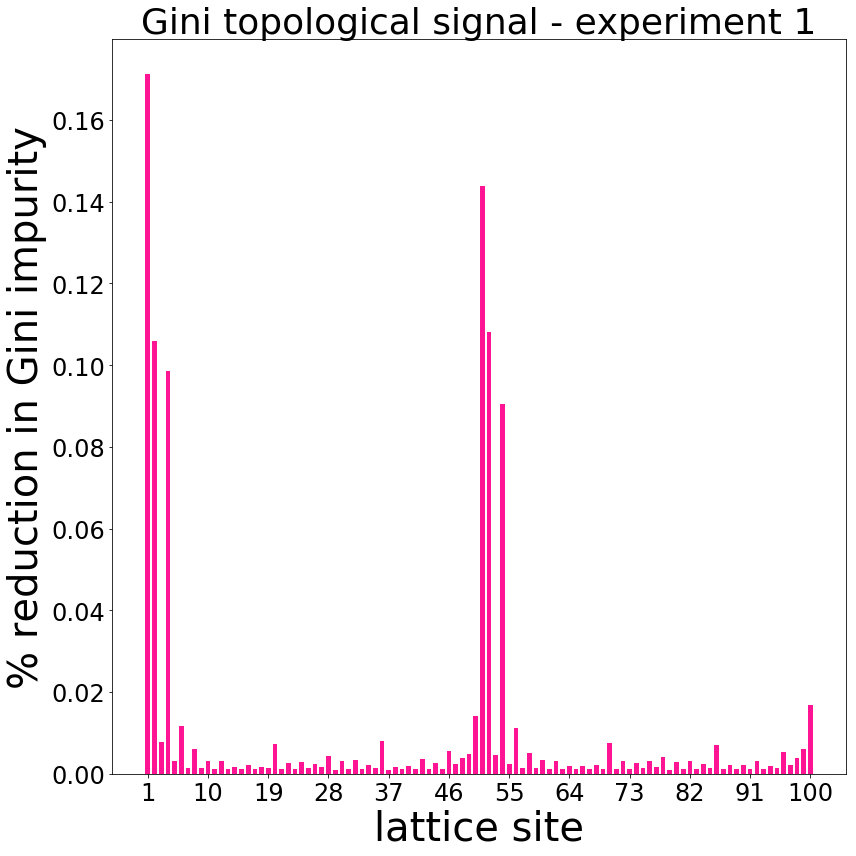

In [10]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
bar_params = {"color": "deeppink", "width": 0.7}
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 40}
ylabel_params = {"ylabel": "% reduction in Gini impurity", "fontsize": 40}
title_params = {"label": "Gini topological signal - experiment 1", "fontsize": 36}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(1,100,12).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "./fig1a-6561-100-feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, bar_params, fig_params, xlabel_params, ylabel_params, title_params,\
                                    xlim_params, ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


#### Plotting cumulative feature importances

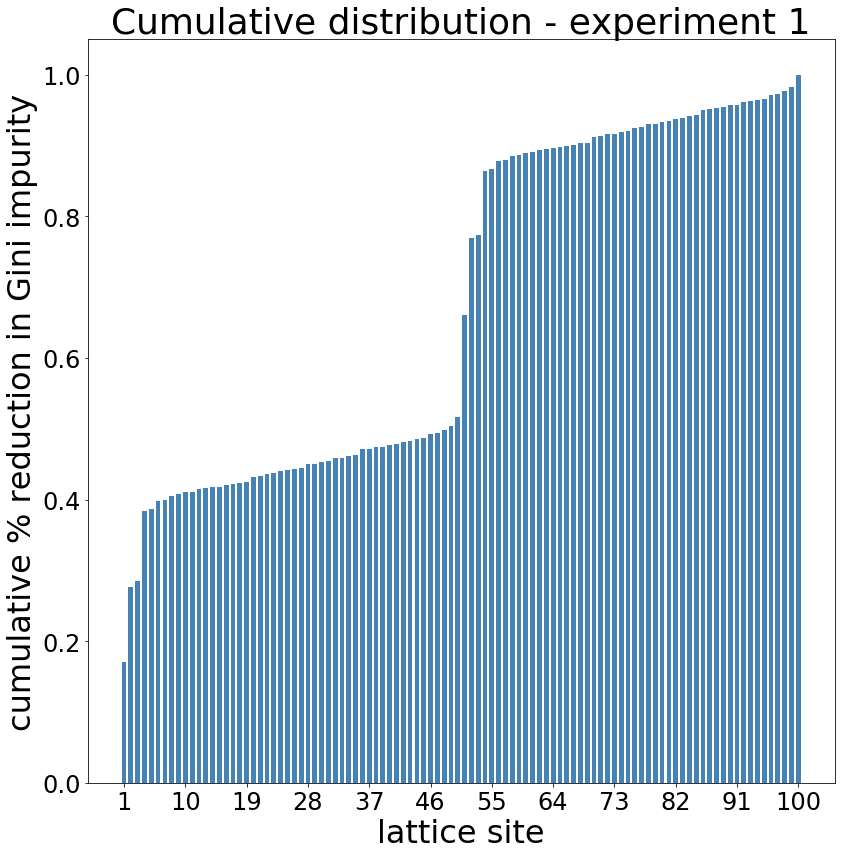

In [11]:
n_features = None
bar_params = {"color":"steelblue", "width": 0.7}
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 32}
ylabel_params = {"ylabel": "cumulative % reduction in Gini impurity", "fontsize": 32}
title_params = {"label": "Cumulative distribution - experiment 1", "fontsize": 36}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
#xticks_params = {"ticks": np.linspace(1,100,12).astype(int), "fontsize": 24}
xticks_params = {"ticks": np.linspace(1,100,12), "fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "./fig1a-6561-100-cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, bar_params, fig_params, xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


In [12]:
np.linspace(0,99,6).astype(int)

array([ 0, 19, 39, 59, 79, 99])

In [13]:
np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,6).astype(int)]

array([ 1, 58, 24, 77, 83, 79])

In [14]:
np.array(list(simulation.cumulative_feature_importance.keys()))

array([  1,  51,  52,   2,   4,  54, 100,  50,   6,  56,  36,   3,  70,
        20,  86,   8,  99,  46,  96,  58,  49,  53,  28,  78,  98,  48,
        42,  32,  60,  92,  12,  76,  72,   5,  62,  30,  10,  82,  80,
        24,  74,  22,  44,  55,  47,  84,  26,  34,  90,  97,  88,  16,
        68,  40,  94,  64,  66,  18,  14,  77,  38,  27,   9,  75,  57,
        25,  85,   7,  59,  35,  95,  19,  93,  69,  67,  91,  23,  71,
        17,  83,  41,  89,  81,  21,  43,  45,  11,  13,  31,  39,  63,
        65,  87,  73,  33,  61,  15,  29,  37,  79])

In [19]:
np.linspace(0,99,6)

array([ 0. , 19.8, 39.6, 59.4, 79.2, 99. ])

In [14]:
np.array(list(simulation.cumulative_feature_importance.keys()))

array([  1,  51,  52,   2,   4,  54, 100,  50,   6,  56,  36,   3,  70,
        20,  86,   8,  99,  46,  96,  58,  49,  53,  28,  78,  98,  48,
        42,  32,  60,  92,  12,  76,  72,   5,  62,  30,  10,  82,  80,
        24,  74,  22,  44,  55,  47,  84,  26,  34,  90,  97,  88,  16,
        68,  40,  94,  64,  66,  18,  14,  77,  38,  27,   9,  75,  57,
        25,  85,   7,  59,  35,  95,  19,  93,  69,  67,  91,  23,  71,
        17,  83,  41,  89,  81,  21,  43,  45,  11,  13,  31,  39,  63,
        65,  87,  73,  33,  61,  15,  29,  37,  79])

In [15]:
np.array( list(simulation.cumulative_feature_importance.keys()) )

array([  1,  51,  52,   2,   4,  54, 100,  50,   6,  56,  36,   3,  70,
        20,  86,   8,  99,  46,  96,  58,  49,  53,  28,  78,  98,  48,
        42,  32,  60,  92,  12,  76,  72,   5,  62,  30,  10,  82,  80,
        24,  74,  22,  44,  55,  47,  84,  26,  34,  90,  97,  88,  16,
        68,  40,  94,  64,  66,  18,  14,  77,  38,  27,   9,  75,  57,
        25,  85,   7,  59,  35,  95,  19,  93,  69,  67,  91,  23,  71,
        17,  83,  41,  89,  81,  21,  43,  45,  11,  13,  31,  39,  63,
        65,  87,  73,  33,  61,  15,  29,  37,  79])

In [16]:
np.linspace(0,100,12).astype(int)

array([  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90, 100])

In [17]:
np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,100,12).astype(int)]

IndexError: index 100 is out of bounds for axis 1 with size 100

In [25]:
np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,12).astype(int)]

array([ 1, 56, 96, 32, 10, 84, 94, 75, 93, 89, 63, 79])

#### Loading experiment

In [2]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Model

In [3]:
experiment.model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Feature importances

In [4]:
experiment.model.feature_importances_

array([1.78298816e-01, 5.75113954e-03, 1.92582682e-02, 1.49519112e-01,
       1.87213607e-03, 2.03794339e-03, 6.09441153e-03, 1.94182152e-03,
       2.56788705e-03, 5.48626365e-03, 1.09656719e-03, 9.45466183e-03,
       8.78168451e-04, 3.62419859e-04, 6.99514915e-04, 1.22864701e-02,
       1.03892791e-03, 3.93394636e-04, 5.17419154e-04, 1.02709941e-02,
       3.39143795e-03, 4.82379261e-04, 1.06964953e-03, 8.14483475e-03,
       1.50211074e-03, 1.05260892e-02, 1.17114890e-03, 9.48095662e-03,
       2.20638672e-03, 4.14044515e-04, 9.57759374e-04, 4.29786834e-03,
       1.07405186e-03, 3.17501479e-04, 2.23310902e-04, 3.85270188e-03,
       5.19630181e-04, 5.18054794e-04, 9.59014473e-04, 1.01503186e-03,
       5.65002673e-04, 1.03372331e-03, 3.61939870e-04, 1.73404264e-02,
       1.46499481e-03, 1.23092461e-03, 4.83760465e-03, 1.63086639e-02,
       5.00046694e-03, 5.70446756e-04, 1.76192622e-01, 1.44935387e-01,
       7.72793273e-04, 3.67663187e-03, 6.00596634e-04, 1.71365380e-02,
      

In [8]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([ 0, 50,  3, 51,  2, 43, 55, 59, 47, 71, 67, 95, 15, 25, 19, 94, 27,
       11, 23, 98, 91,  6,  1, 83,  9, 48, 75, 46, 70, 31, 74, 63, 99, 35,
       53, 20, 93,  8, 68, 28, 90,  5,  7,  4, 79, 56, 57, 24, 62, 44, 58,
       76, 60, 82, 96, 45, 26, 61, 84, 10, 32, 22, 16, 41, 39, 72, 38, 30,
       64, 66, 77, 65, 12, 85, 81, 87, 97, 52, 14, 86, 92, 54, 80, 49, 88,
       40, 36, 37, 18, 21, 89, 29, 17, 13, 42, 78, 33, 69, 34, 73])

In [9]:
experiment.model.feature_importances_[features_sorted_by_importance]

array([1.78298816e-01, 1.76192622e-01, 1.49519112e-01, 1.44935387e-01,
       1.92582682e-02, 1.73404264e-02, 1.71365380e-02, 1.71124514e-02,
       1.63086639e-02, 1.51641235e-02, 1.49662269e-02, 1.27488434e-02,
       1.22864701e-02, 1.05260892e-02, 1.02709941e-02, 1.01063009e-02,
       9.48095662e-03, 9.45466183e-03, 8.14483475e-03, 7.85658263e-03,
       6.83981184e-03, 6.09441153e-03, 5.75113954e-03, 5.64665213e-03,
       5.48626365e-03, 5.00046694e-03, 4.92617492e-03, 4.83760465e-03,
       4.61121398e-03, 4.29786834e-03, 4.25263018e-03, 4.07125343e-03,
       3.90629824e-03, 3.85270188e-03, 3.67663187e-03, 3.39143795e-03,
       2.63083720e-03, 2.56788705e-03, 2.37988029e-03, 2.20638672e-03,
       2.08601941e-03, 2.03794339e-03, 1.94182152e-03, 1.87213607e-03,
       1.66772441e-03, 1.66162823e-03, 1.63819261e-03, 1.50211074e-03,
       1.47753012e-03, 1.46499481e-03, 1.36467329e-03, 1.33403638e-03,
       1.29123496e-03, 1.26883342e-03, 1.25117403e-03, 1.23092461e-03,
      

In [10]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "1"
experiment = Experiment(simulation_dir, experiment_name)

In [11]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([ 0,  1,  3, 53,  5, 51, 97, 69, 50, 83, 45, 25, 35, 99, 63, 85, 77,
       81, 27, 93,  8,  9, 57, 98, 48, 68, 23, 61, 37,  4, 96, 55,  7, 43,
       21, 82, 52,  2, 32, 60, 17, 19, 73, 24, 84, 79, 56, 72, 39, 29, 91,
       92, 89, 87, 80, 13, 86, 74, 16, 31, 95, 10, 33, 58, 88, 36, 30, 75,
       49, 46, 65, 67, 71, 40, 28, 78, 22, 59, 12, 15, 47, 90,  6, 11, 18,
       62, 41, 64, 34, 94, 76, 66, 54, 70, 26, 44, 20, 14, 42, 38])

In [12]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "2"
experiment = Experiment(simulation_dir, experiment_name)

In [13]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([ 0,  3, 50, 51,  1, 99, 98, 11, 35, 95, 91, 71, 53,  2, 59, 76, 79,
       19, 43, 83,  7, 75, 55,  4, 67, 47, 62, 46, 87, 84, 77, 58, 74, 18,
        6, 42, 82, 31, 48, 54, 65, 96, 27, 94, 23, 68, 44, 22,  5, 16, 90,
       69, 86, 66,  8, 28, 34, 26, 10, 36, 14, 73, 61, 52, 80, 38, 12, 64,
       70, 40, 92, 41, 88, 78, 97, 24, 20, 29, 72, 32, 56, 30, 25, 93, 33,
       60, 17, 37, 63, 15, 81,  9, 57, 21, 85, 45, 89, 49, 13, 39])

In [14]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "3"
experiment = Experiment(simulation_dir, experiment_name)

In [15]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([ 0, 50,  3, 51,  1, 99, 75, 89, 95, 35, 59, 23,  7, 27,  4, 25, 93,
       79, 15, 19, 67, 69, 97, 98, 55, 71, 43, 31,  5, 53, 46, 77, 72, 74,
       88, 66, 12, 82, 18, 26, 11, 91, 41, 30, 96,  2, 80, 48, 10, 76, 94,
       24, 87, 70, 42, 40, 16, 54, 20, 34, 60, 21, 86, 49, 63, 83, 56, 39,
       92, 52,  8, 14, 44,  6, 13, 38, 29, 65, 57, 28, 64, 68, 36, 45, 22,
       32, 58, 84, 62, 90, 85, 78, 61, 17,  9, 33, 81, 47, 37, 73])

In [16]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "4"
experiment = Experiment(simulation_dir, experiment_name)

In [17]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([51,  0, 53,  3, 50, 99, 43, 35, 83, 19, 55, 49, 31, 85, 27, 91,  1,
       47, 70, 48, 73, 14, 98, 75, 95, 59, 46,  7, 88, 82, 54, 11, 15, 90,
        5, 71,  4,  2, 30, 67, 13, 12, 68, 37, 40, 52, 60, 77, 92, 96, 32,
       29, 34, 23, 16, 26, 24, 87, 10,  8, 45, 20, 61, 22, 38, 56, 72, 18,
       58, 86, 41, 76, 25, 21, 42, 36, 84, 89, 97, 44, 79, 94,  9, 63,  6,
       93, 57, 78, 33, 28, 81, 62, 74, 64, 17, 66, 65, 80, 39, 69])

In [ ]:
######### feature importances 
#importances = tree_clf.feature_importances_
#sorted_indices = np.argsort(importances)[::-1]
#sorted_importances = importances[sorted_indices]
#cumulative_importances = np.cumsum(sorted_importances)
sorted_indices, sorted_importances, cumulative_importances = \
plot_feature_importances(tree_clf, n_features = "all", return_arrays = True)

In [1]:
experiment.model.feature_importances_

NameError: name 'experiment' is not defined

In [ ]:
a = np.array([])
b =  np.array([1,2,3])
c = np.vstack

In [8]:
ar = np.array([[1,2,3], [4,5,6]])
ar2 = [np.array([1,2,3]), np.array([4,5,6])]
np.mean(ar2,axis = 0)

array([2.5, 3.5, 4.5])

In [9]:
np.mean(ar2,axis = 0)

array([2.5, 3.5, 4.5])

In [27]:
 {"ticks": [str(ix) for ix in np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,12).astype(int)] ]}

{'ticks': ['1',
  '56',
  '96',
  '32',
  '10',
  '84',
  '94',
  '75',
  '93',
  '89',
  '63',
  '79']}